# Les bases de la dynamique des populations


- croissances géométrique et exponentielle 
- logistique
- Lotka-Voltera
- chemostat


Theory-guided Data Science

<img src="./images/theory_guided_data_science.png" alt="Theory-guided Data Science" style="width: 400px;"/>

after [Theory-guided Data Science: A New Paradigm for Scientific Discovery](https://arxiv.org/abs/1612.08544) 
Anuj Karpatne et al


## La suite de Fibonacci

<!---
<img src="https://upload.wikimedia.org/wikipedia/commons/3/35/Fibonacci2.jpg">
--->

[Leonardo Fibonacci](https://en.wikipedia.org/wiki/Fibonacci) (c. 1170-c. 1250) considera en 1202 un problème de croissance de populations de lapins:

> Combien de couples de lapins obtiendrons-nous à la fin de l'année si, 
> commençant avec un couple, chacun des couples produisait chaque mois un 
> nouveau couple lequel deviendrait productif au second mois de son existence ?

Si $x_{n}$ désigne la taille de la population au mois $n$ et si on suppose que $x_{1}=x_{2}=1$, alors au troisième mois ce couple se reproduit donc $x_{3}=2$, le mois suivant le premier couple se reproduit à nouveau et le couple obtenu au mois précédent n'est pas encore productif donc $x_{4}=3$, ainsi de suite:
![suite de Fibonacci](./images/suite_fibonacci.png)
(en rouge les couples en âge de se reproduire). 

À un mois $n$ donné, la population comprend tous les couples du mois $n-2$ qui se sont reproduits au mois $n-1$ donc $2\,x_{n-2}$ auxquels s'ajoutent les couples produits au mois $n-1$ qui ne sont pas en âge de se reproduire, c'est-à-dire $x_{n-1}-x_{n-2}$. Ainsi $x_{n}=2\,x_{n-2}+(x_{n-1}-x_{n-2})$ d'où la relation de récurrence:
\begin{equation}
\label{eq.fibonacci}
 x_{n} = x_{n-1}+x_{n-2}\,,\ x_{1}=x_{2}=1\,.
\end{equation}
Cette [suite](https://en.wikipedia.org/wiki/Fibonacci_number) dite de Fibonacci est décrite sous la forme d'un système dynamique en temps discret \eqref{eq.fibonacci}, i.e. la taille de la population n'est explicitement pas donnée, seule la dynamique de croissance locale en temps l'est.
Il faudra attendre plus de cinq cent ans pour que la formule explicite de cette suite soit établie: 
\begin{equation}
\label{eq.fibonacci.exp}
x_{n}=[{(1+\sqrt{5})^n-(1-\sqrt{5})^{n}}]/[{2^n\,\sqrt{5}}]\,.
\end{equation}
Sur la plan de la dynamique de populations cette suite ne présente que peu d'intérêt. En effet elle croit plus vite que $n^2$ mais nettement moins vite que $2^n$. Elle a plus étonnamment trouvé des applications en [architecture des plantes](https://en.wikipedia.org/wiki/Patterns_in_nature). 

On dispose de [pluisieurs façons](http://stackoverflow.com/questions/494594/how-to-write-the-fibonacci-sequence-in-python) de programmer cela en Python. La version récursive n'est pas la plus efficace, la plus simple est relativement efficace:

In [12]:
import numpy as np

def fibonacci(n):
 a,b = 1,1
 for i in range(n-1):
  a,b = b,a+b
 return a

def fibonacci_explicit(n):
    return np.int(np.ceil((1+np.sqrt(5))**n-(1-np.sqrt(5))**n)/(2**n*np.sqrt(5)))

def fibonacci_recursive(n):
    if n==1 or n==2:
        return 1
    return fibonacci_recursive(n-1)+fibonacci_recursive(n-2)

## Digression: comparer des temps d'exécution

Jypiter  [permet](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)  de mesurer des temps d'exécution, de profiler et de débugger. Pour mesurer les temps d'exécution on fait appel aux [commandes magiques](http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb) comme `time` ou `timeit`.



In [13]:
%time
for n in range(1,20):
    fibonacci(n)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 24.8 µs


In [14]:
%time
for n in range(1,20):
    fibonacci_explicit(n)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [15]:
%time
for n in range(1,20):
    fibonacci_recursive(n)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


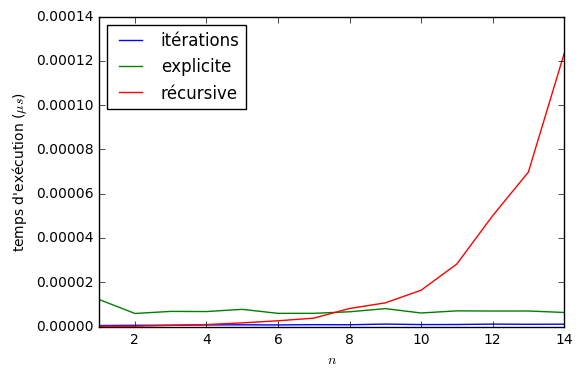

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

temps_calcul = {}
temps_calcul['itérations'] = {}
temps_calcul['explicite'] = {}
temps_calcul['récursive'] = {}
for n in range(1,15):
    result = %timeit -n 10 -q -o fibonacci(n)   
    ''' -n number of times the instruction is executed
    -q quiet 
    -o return a TimeitResult that can be stored in a variable to inspect
    '''
    temps_calcul['itérations'][n] = result.best
    result = %timeit -n 10 -q -o fibonacci_explicit(n)
    temps_calcul['explicite'][n] = result.best
    result = %timeit -n 10 -q -o fibonacci_recursive(n)
    temps_calcul['récursive'][n] = result.best        
for a,b in temps_calcul.items():
    plt.plot(list(b.keys()),list(b.values()))
plt.xlim(1,14)
plt.legend(list(temps_calcul.keys()), loc='upper left')
plt.ylabel(r"temps d'exécution ($\mu s$)")
plt.xlabel(r'$n$')
plt.show()


La formule explicite \eqref{eq.fibonacci.exp} conduit à un très mauvais algorithme puisque pour les grandes valeurs de $n$, elle fait apparaitre par exemple la différence de deux termes $1+\sqrt(5))^n$ et $1-\sqrt(5))^n$ qui divergent.

## Croissances géométrique et exponentielle


La suite de Fibonacci n'est pas un bon modèle de population. Des modèles en temps discret on été proposés aux XVII et XVIIIe siècles.   Les premiers modèles en temps continu apparaissent au 18ème siècle.

[Daniel Bernoulli](https://en.wikipedia.org/wiki/Daniel_Bernoulli) (1700-1782) proposa une des premières études d'épidémiologie concernant l'inoculation de la variole. 
En 1760, il propose un modèle épidémiologique à l'aide d'équations différentielles et établit que, selon ce modèle, la généralisation de cette pratique permettrait de gagner un peu plus de trois ans d’espérance de vie à la naissance. La pratique a été généralisée quelques dizaines d'années plus tard par le médecin anglais Edward Jenner. C'est seulement un siècle plus tard que Louis Pasteur a clairement établi le principe d'action de la vaccination et celui du système immunitaire.

[Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler) (1707-1783) décrit la croissance géométrique des populations. 

[Thomas Malthus](https://fr.wikipedia.org/wiki/Thomas_Malthus) (1766-1834) pense que les idées progressives de Condorcet et William Godwin concernant les politiques à adopter face à la misère d'une classe importante de la population sont dangereuses. Pour lui: 

> ``The great error under which Mr Godwin labours throughout his whole work is the attributing almost all the vices and misery that are seen in civil society to human institutions... [T]he truth is, that though human institutions appear to be the obvious and obtrusive causes of much mischief to mankind, yet in reality they are light and superficial, they are mere feathers that float on the surface, in comparison with those deeper seated causes of impurity that corrupt the springs and render turbid the whole stream of human life.'' 

Pour Malthus la croissance géométrique de la population face à une croissance arithmétique des ressources conduit toujours au développement d'une classe exposée au vice et à la misère. Il est un peu facile d'opposer le progressiste Godwin et le conservateur Malthus, ces questions essentielles et toujours d'actualité mérite une nouvelle lecture de ces auteurs \citep{mayhew2016a}.


Il propose ainsi de coupler un modèle de croissance de population et des  ressources. Le modèle de Malthus n'est toutefois pas réaliste dans la mesure où il ne tient pas compte de l'influence du niveau des ressources sur la croissance de la population. 

 
La première étape consiste à appréhender la croissance géométique (temps discret) et exponentielle (temps continu).

Modèle linéaire
$$
   \dot x(t) = (\lambda-\mu)\,x(t)\,,\ x(0)=x_0
$$
taux de naissance $\lambda>0$, taux de mort $\mu>0$.

In [17]:
population = lambda t: x0*np.exp((rb-rd)*t)

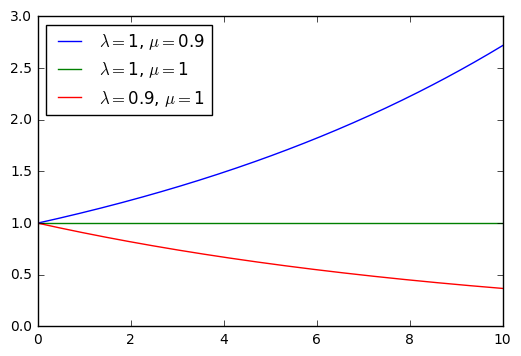

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

t0, t1 = 0, 10
temps = np.linspace(t0,t1,200, endpoint=True)

legende = []
for x0, rb, rd in zip([1, 1, 1], [1, 1, 0.9], [0.9, 1, 1]):
    plt.plot(temps, population(temps))
    legende = legende + [r'$\lambda=$'+str(rb)+r', $\mu=$'+str(rd),]
plt.legend(legende, loc='upper left')
plt.show()

## Croissance logistique

En 1838,
 [Pierre François Verhulst](https://en.wikipedia.org/wiki/Pierre_Francois_Verhulst) (1804-1849)
 proposa un modèle de croissance  dont le taux de croissance diminue linéairement en fonction de la taille de la population rendant ainsi compte de la capacité maximale d'accueil du milieu \citep{verhulst1838a}. Cette courbe dite logistique, a été redécouverte et (très) popularisée par le biologiste et démographe Raymond Pearl  \citep{pearl1920a,kingsland1982a}.


$$
  \dot x(t) = r\,\left(1-\frac{x(t)}{K}\right)\,x(t)\,,\ x(0)=x_0
$$
admet l'unique solution:
$$
  x(t) =  K \,\frac{1}{1+\left(\frac {K}{x_{0}} - 1\right) \,e^{-r\,t}}\,.
$$

In [9]:
population = lambda t: K*1/(1+ (K/x0-1) * np.exp(-r*t))

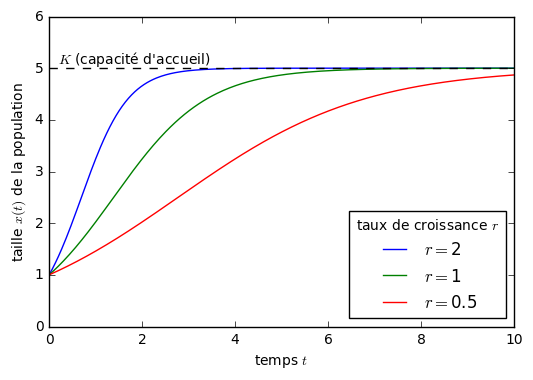

In [10]:
t0, t1 = 0, 10

temps = np.linspace(t0,t1,300, endpoint=True)

x0, K = 1, 5
legende = []
for r in [2, 1, 0.5]:
    plt.plot(temps, population(temps))
    legende = legende + [r'$r=$'+str(r),]    
plt.ylim([0,K*1.2])
plt.legend(legende, loc='lower right',title=r'taux de croissance $r$')
plt.plot([t0, t1], [K, K], color="k", linestyle='--')
plt.text((t1-t0)/50, K, r"$K$ (capacité d'accueil)", 
         verticalalignment='bottom', horizontalalignment='left')
plt.xlabel(r'temps $t$')
plt.ylabel(r'taille $x(t)$ de la population')
plt.show()

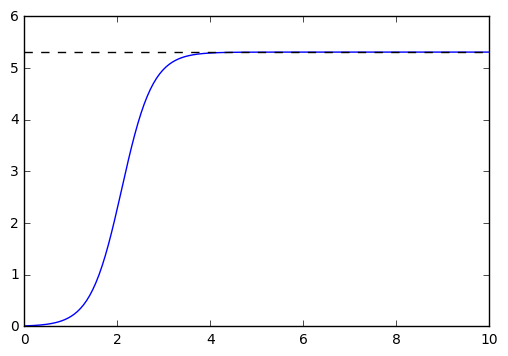

In [11]:
from IPython.html.widgets import interact, fixed

def pltlogistique(x0,K,r):
    population2 = K*1/(1+ (K/x0-1) * np.exp(-r*temps))
    plt.plot(temps, population2)
    plt.ylim([0,6])
    plt.plot([t0, t1], [K, K], color="k", linestyle='--')
    plt.show()
    
interact(pltlogistique, x0=(0.01,6,0.1), K=(0.01,6,0.1), r=(0.1,20,0.1))
plt.show()

## Modèle de Lotka-Volterra

Le [modèle de Lotka-Volterra](https://fr.wikipedia.org/wiki/Équations_de_Lotka-Volterra) représente deux populations en interaction, des proies, de taille $x(t)$, ayant accès à une ressource ilimitée (non modélisée) et des prédateurs se nourissant de proies. En l'absence de prédateurs, la population de proies croit de façon exponentielle selon un taux $r_1$; en l'abscence de proies, la population de prédateurs décroit de façon exponentielle selon un taux $r_2$.
On suppose que $r_1$ dépend de $y(t)$ et que $r_2$ dépend de $x(t)$: 

- $r_1=a-b\,y(t)$, où $a$ est le taux de naissance des proies en l'absence de prédateurs et $b\,y(t)$ est le taux de prédation que l'on suppose linéaire en $y(t);

- $r_2=c-d\,x(t)$, où $c$ est le taux de mort des prédateurs en l'absence de proies et $d\,x(t)$ est le taux de naissance des prédateurs que l'on suppose linéaire en $x(t)$.

On obtient donc un système de deux équations différentielles couplées:
\begin{align*}
\dot x(t) &= [a-b\,y(t)]\,x(t)
\\
\dot y(t) &= - [c-d\,x(t)]\,y(t)
\end{align*}
ce système n'admet pas de solution explicites, on doit faire appel à une méthode numérique.






In [11]:
from scipy.integrate import odeint
import matplotlib.gridspec as gridspec

a, b, c, d = 0.4, 0.002, 0.001, 0.7
def f(xy, t):
    x, y = xy
    return [a * x - b * x * y, c * x * y - d * y]

xy0 = [600, 400]
t = np.linspace(0, 50, 250)
xy_t = odeint(f, xy0, t)

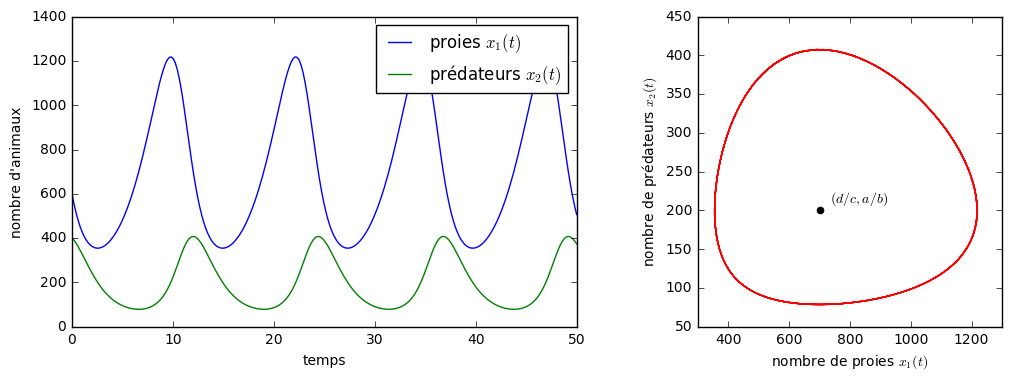

In [12]:
fig = plt.subplots(1, 2, figsize=(12, 4))

gs = gridspec.GridSpec(1, 2, width_ratios=[8.3, 5], wspace=0.3)

ax0 = plt.subplot(gs[0])
ax0.plot(t, xy_t[:,0], label=r"proies $x_1(t)$")
ax0.plot(t, xy_t[:,1], label=r"prédateurs $x_2(t)$")
ax0.set_xlabel("temps")
ax0.set_ylabel("nombre d'animaux")
ax0.legend()
ax1 = plt.subplot(gs[1])
ax1.plot(xy_t[:,0], xy_t[:,1], color="r")
ax1.set_xlabel(r"nombre de proies $x_1(t)$")
ax1.set_ylabel(r"nombre de prédateurs $x_2(t)$")
marker_style = dict(linestyle=':', markersize=10)
ax1.plot([d/c], [a/b], marker='.', **marker_style, color="k")
ax1.text(1.05*d/c, 1.05*a/b, r'$(d/c,a/b)$')
plt.show()